In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression





In [ ]:
from seaborn import regression

In [ ]:

sns.set(style="whitegrid")


In [ ]:
gold_data = pd.read_csv("Gold For Dollar Prediction.csv")
inflation_data = pd.read_csv("INFLATION RATE.csv")
unemployment_rate_data = pd.read_csv("Unemployment Rate.csv")
brend_oil_data = pd.read_csv("Brent Oil For Dollar Prediction.csv")
euro_usd_data = pd.read_csv("EUR_USD Historical Data_2000_2019.csv")

# Display basic information about each dataset


## Gold Data Info

In [ ]:
gold_data.head()


,Date,High,Low,Currency
0,1/4/2000,289.5,280.0,USD
1,1/5/2000,285.0,281.0,USD
2,1/6/2000,282.8,280.2,USD
3,1/7/2000,284.5,282.0,USD
4,1/10/2000,283.9,281.8,USD


In [ ]:
gold_data.tail()

,Date,High,Low,Currency
5698,8/29/2022,1757.90,1731.40,USD
5699,8/30/2022,1752.80,1732.90,USD
5700,8/31/2022,1738.00,1720.60,USD
5701,9/1/2022,1723.00,1699.10,USD
5702,9/2/2022,1729.45,1707.05,USD


In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703 entries, 0 to 5702
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5703 non-null   object 
 1   High      5703 non-null   float64
 2   Low       5703 non-null   float64
 3   Currency  5703 non-null   object 
dtypes: float64(2), object(2)
memory usage: 178.3+ KB


In [ ]:
gold_data.describe()

,High,Low
count,5703.000000,5703.000000
mean,1048.339181,1031.863169
std,522.353946,514.455903
min,259.400000,255.100000
25%,463.900000,457.450000
50%,1198.000000,1179.700000
75%,1392.750000,1368.100000
max,2089.200000,2049.000000


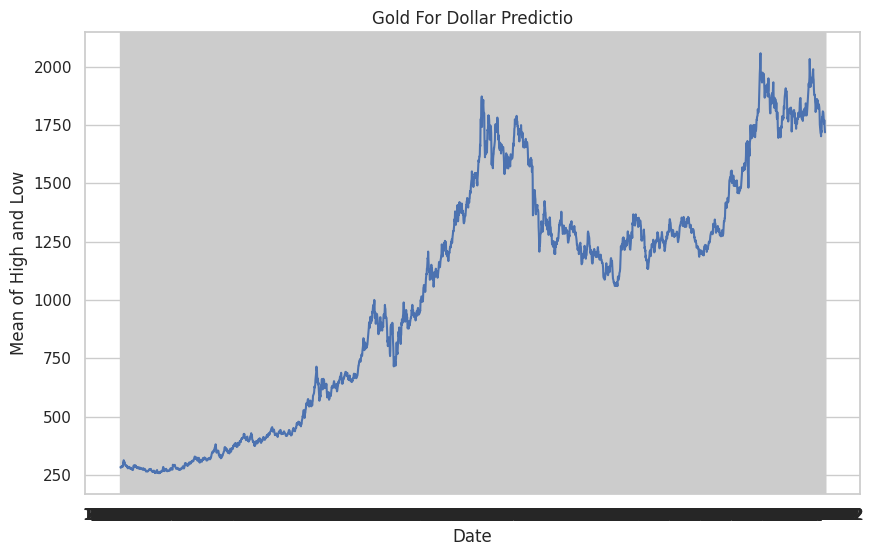

In [ ]:
downsampled_data = gold_data.iloc[::2]

# Calculate the mean of 'High' and 'Low' for each row in the downsampled data
mean_values = downsampled_data[['High', 'Low']].mean(axis=1)

# Downsample the 'Date' to match the number of data points in 'mean_values'
downsampled_dates = downsampled_data['Date']

plt.figure(figsize=(10, 6))
plt.title('Gold For Dollar Predictio')
plt.xlabel('Date')
plt.ylabel('Mean of High and Low')
plt.plot(downsampled_dates, mean_values)

plt.show()

## inflation_data

In [ ]:
inflation_data.head()

,DATE,INFLATION RATE
0,1/1/2000,3.376857
1,1/1/2001,2.826171
2,1/1/2002,1.586032
3,1/1/2003,2.270095
4,1/1/2004,2.677237


In [ ]:
inflation_data.tail()

,DATE,INFLATION RATE
18,1/1/2018,2.442583
19,1/1/2019,1.812210
20,1/1/2020,1.233584
21,1/1/2021,4.697859
22,1/1/2022,8.002800


In [ ]:
inflation_data.describe()

,INFLATION RATE
count,23.000000
mean,2.493215
std,1.664072
min,-0.355546
25%,1.604127
50%,2.270095
75%,3.191393
max,8.002800


In [ ]:
inflation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            23 non-null     object 
 1   INFLATION RATE  23 non-null     float64
dtypes: float64(1), object(1)
memory usage: 496.0+ bytes


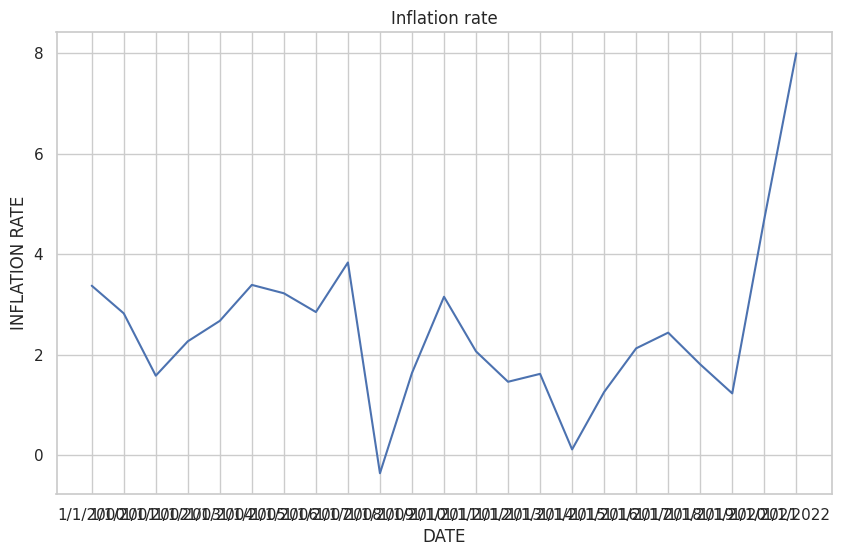

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Inflation rate')
plt.xlabel('DATE')
plt.ylabel('INFLATION RATE')
plt.plot(inflation_data['DATE'], inflation_data['INFLATION RATE'])


## unemployment rate

In [ ]:
unemployment_rate_data.head()

,DATE,RATE
0,1/1/2000,4.0
1,2/1/2000,4.1
2,3/1/2000,4.0
3,4/1/2000,3.8
4,5/1/2000,4.0


In [ ]:
unemployment_rate_data.tail()

,DATE,RATE
279,4/1/2023,3.4
280,5/1/2023,3.7
281,6/1/2023,3.6
282,7/1/2023,3.5
283,8/1/2023,3.8


In [ ]:
unemployment_rate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    284 non-null    object 
 1   RATE    284 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.6+ KB


In [ ]:
unemployment_rate_data.describe()

,RATE
count,284.000000
mean,5.793310
std,1.968764
min,3.400000
25%,4.400000
50%,5.300000
75%,6.700000
max,14.700000


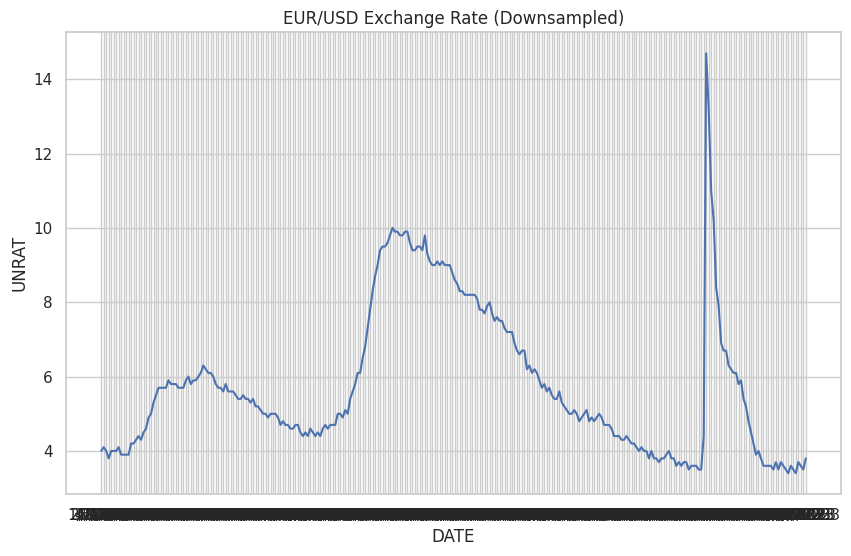

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('EUR/USD Exchange Rate (Downsampled)')
plt.xlabel('DATE')
plt.ylabel('UNRAT')
plt.plot(unemployment_rate_data['DATE'], unemployment_rate_data['RATE'])
plt.show()

## brend oil

In [ ]:
brend_oil_data.head()

,Date,High,Low,Change %
0,7/1/2019,66.75,64.22,-2.24%
1,6/28/2019,66.84,66.08,0.00%
2,6/27/2019,66.82,65.63,0.09%
3,6/26/2019,66.85,65.60,2.21%
4,6/25/2019,65.98,64.17,0.29%


In [ ]:
brend_oil_data.tail()

,Date,High,Low,Change %
4995,1/10/2000,23.78,23.04,2.77%
4996,1/7/2000,23.98,23.05,-2.24%
4997,1/6/2000,24.22,23.35,-0.46%
4998,1/5/2000,24.37,23.70,-2.71%
4999,1/4/2000,24.70,23.89,-2.75%


In [ ]:
brend_oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5000 non-null   object 
 1   High      5000 non-null   float64
 2   Low       5000 non-null   float64
 3   Change %  5000 non-null   object 
dtypes: float64(2), object(2)
memory usage: 156.4+ KB


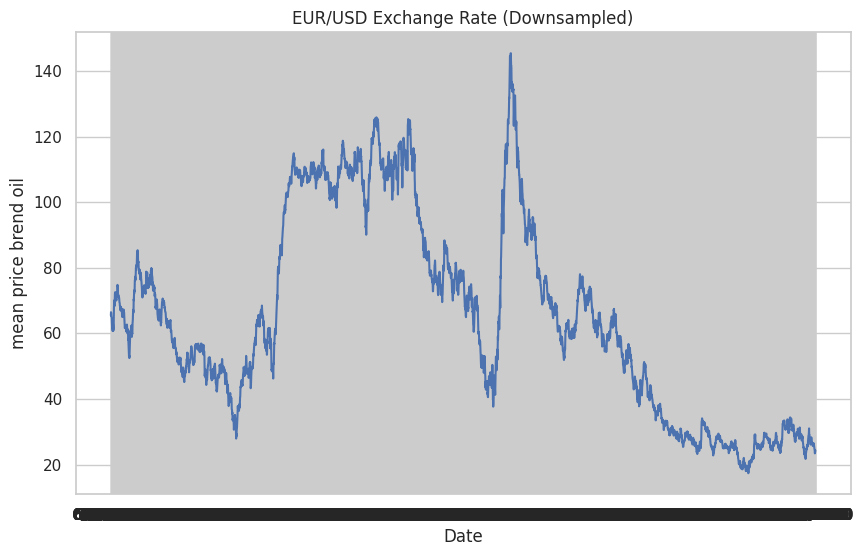

In [ ]:

mean_price_brend_oil = brend_oil_data[['High', 'Low']].mean(axis=1)


plt.figure(figsize=(10, 6))
plt.title('EUR/USD Exchange Rate (Downsampled)')
plt.xlabel('Date')
plt.ylabel('mean price brend oil')
plt.plot(brend_oil_data['Date'], mean_price_brend_oil)
plt.show()

## euro usd

In [ ]:
euro_usd_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,03/01/2019,1.1377,1.1372,1.1410,1.1353,NaN,0.05%
1,02/28/2019,1.1371,1.1371,1.1421,1.1357,NaN,0.02%
2,02/27/2019,1.1369,1.1396,1.1404,1.1360,NaN,-0.16%
3,02/26/2019,1.1387,1.1366,1.1404,1.1343,NaN,0.25%
4,02/25/2019,1.1359,1.1338,1.1369,1.1323,NaN,0.14%


In [ ]:
euro_usd_data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
4995,01/07/2000,1.0292,1.0327,1.0333,1.0252,NaN,-0.31%
4996,01/06/2000,1.0324,1.0325,1.0419,1.0275,NaN,0.08%
4997,01/05/2000,1.0316,1.0295,1.0404,1.0282,NaN,0.04%
4998,01/04/2000,1.0312,1.0244,1.0347,1.0213,NaN,0.46%
4999,01/03/2000,1.0265,1.0052,1.0282,1.0050,NaN,1.89%


In [ ]:
euro_usd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5000 non-null   object 
 1   Price     5000 non-null   float64
 2   Open      5000 non-null   float64
 3   High      5000 non-null   float64
 4   Low       5000 non-null   float64
 5   Vol.      0 non-null      float64
 6   Change %  5000 non-null   object 
dtypes: float64(5), object(2)
memory usage: 273.6+ KB


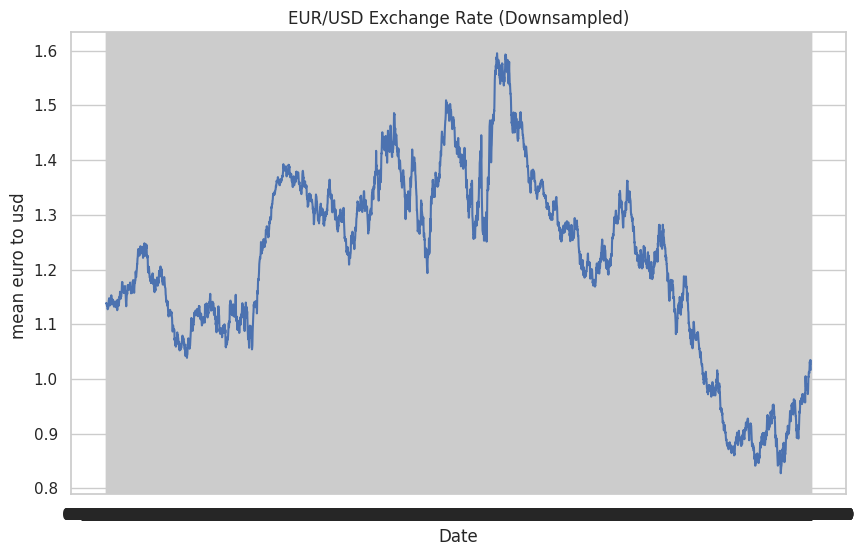

In [ ]:

mean_euro_usd_data = euro_usd_data[['High', 'Low']].mean(axis=1)


plt.figure(figsize=(10, 6))
plt.title('EUR/USD Exchange Rate (Downsampled)')
plt.xlabel('Date')
plt.ylabel('mean euro to usd ')
plt.plot(euro_usd_data['Date'], mean_euro_usd_data)
plt.show()

# data processing

## infaltion rate


In [ ]:
#Shoule execute one time
# Convert the 'DATE' column to a datetime data type with the 'm/d/y' format
inflation_data['DATE'] = pd.to_datetime(inflation_data['DATE'], format='%m/%d/%Y')

# Set the 'DATE' column as the DataFrame index
inflation_data.set_index('DATE', inplace=True)

# Create a date range from the start date (01/01/2000) to the end date (12/31/2022)
date_range = pd.date_range(start='01/01/2000', end='12/31/2022', freq='D')

# Reindex the DataFrame with the date range and fill missing values with forward fill
inflation_data = inflation_data.reindex(date_range, method='ffill')

# Reset the index to make the 'DATE' a regular column
inflation_data.reset_index(inplace=True)

# rename the index column
inflation_data.rename(columns={'index': 'Date'}, inplace=True)

In [ ]:
inflation_data

,Date,INFLATION RATE
0,2000-01-01,3.376857
1,2000-01-02,3.376857
2,2000-01-03,3.376857
3,2000-01-04,3.376857
4,2000-01-05,3.376857
...,...,...
8396,2022-12-27,8.002800
8397,2022-12-28,8.002800
8398,2022-12-29,8.002800
8399,2022-12-30,8.002800


## unemployment rate

In [ ]:
unemployment_rate_data['DATE'] = pd.to_datetime(unemployment_rate_data['DATE'], format='%d/%m/%Y')
unemployment_rate_data.set_index('DATE', inplace=True)

date_range = pd.date_range(start='01/01/2000', end='12/31/2022', freq='D')

# Reindex the DataFrame with the date range and fill missing values with forward fill
unemployment_rate_data = unemployment_rate_data.reindex(date_range, method='ffill')

# Reset the index to make the 'DATE' a regular column
unemployment_rate_data.reset_index(inplace=True)

# rename the index column
unemployment_rate_data.rename(columns={'index': 'Date'}, inplace=True)




In [ ]:
unemployment_rate_data

,Date,RATE
0,2000-01-01,4.0
1,2000-01-02,4.1
2,2000-01-03,4.0
3,2000-01-04,3.8
4,2000-01-05,4.0
...,...,...
8396,2022-12-27,3.5
8397,2022-12-28,3.5
8398,2022-12-29,3.5
8399,2022-12-30,3.5


## Gold



In [ ]:
## tranform that date
gold_data['Date'] = pd.to_datetime(gold_data['Date'], format='%m/%d/%Y')
## remove the current column

gold_data['Mean_Price_Gold'] = (gold_data['High'] + gold_data['Low']) / 2

gold_data.drop(columns=['Currency'], inplace=True)
gold_data.drop(columns=['High'], inplace=True)
gold_data.drop(columns=['Low'], inplace=True)

In [ ]:
gold_data

,Date,Mean_Price_Gold
0,2000-01-04,284.75
1,2000-01-05,283.00
2,2000-01-06,281.50
3,2000-01-07,283.25
4,2000-01-10,282.85
...,...,...
5698,2022-08-29,1744.65
5699,2022-08-30,1742.85
5700,2022-08-31,1729.30
5701,2022-09-01,1711.05


## brend_oil_data

In [ ]:
brend_oil_data['Date'] = pd.to_datetime(brend_oil_data['Date'], format='%m/%d/%Y')

brend_oil_data['Mean_Price_Brend_oil'] = (brend_oil_data['High'] + brend_oil_data['Low']) / 2

brend_oil_data.drop(columns=['Change %'], inplace=True)
brend_oil_data.drop(columns=['High'], inplace=True)
brend_oil_data.drop(columns=['Low'], inplace=True)


In [ ]:
brend_oil_data

,Date,Mean_Price_Brend_oil
0,2019-07-01,65.485
1,2019-06-28,66.460
2,2019-06-27,66.225
3,2019-06-26,66.225
4,2019-06-25,65.075
...,...,...
4995,2000-01-10,23.410
4996,2000-01-07,23.515
4997,2000-01-06,23.785
4998,2000-01-05,24.035


## euro usd

In [ ]:
euro_usd_data['Date'] = pd.to_datetime(brend_oil_data['Date'], format='%m/%d/%Y')
euro_usd_data.drop(columns=['Open'], inplace=True)
#euro_usd_data.drop(columns=['High'], inplace=True)
#euro_usd_data.drop(columns=['Low'], inplace=True)
euro_usd_data.drop(columns=['Vol.'], inplace=True)
euro_usd_data.drop(columns=['Change %'], inplace=True)
euro_usd_data.rename(columns={'Price': 'Price of dollar'}, inplace=True)
euro_usd_data.rename(columns={'High': 'max'}, inplace=True)
euro_usd_data.rename(columns={'Low': 'min'}, inplace=True)


In [ ]:
euro_usd_data

,Date,Price of dollar,max,min
0,2019-07-01,1.1377,1.1410,1.1353
1,2019-06-28,1.1371,1.1421,1.1357
2,2019-06-27,1.1369,1.1404,1.1360
3,2019-06-26,1.1387,1.1404,1.1343
4,2019-06-25,1.1359,1.1369,1.1323
...,...,...,...,...
4995,2000-01-10,1.0292,1.0333,1.0252
4996,2000-01-07,1.0324,1.0419,1.0275
4997,2000-01-06,1.0316,1.0404,1.0282
4998,2000-01-05,1.0312,1.0347,1.0213


In [ ]:
euro_usd_data.tail()

,Date,Price of dollar,max,min
4995,2000-01-10,1.0292,1.0333,1.0252
4996,2000-01-07,1.0324,1.0419,1.0275
4997,2000-01-06,1.0316,1.0404,1.0282
4998,2000-01-05,1.0312,1.0347,1.0213
4999,2000-01-04,1.0265,1.0282,1.0050


## merge the arrays


In [ ]:
# data_merge = pd.merge(inflation_data, unemployment_rate_data,gold_data,brend_oil_data, on='Date', how='left')
print(inflation_data.columns)
print(gold_data.columns)
print(unemployment_rate_data.columns)
print(brend_oil_data.columns)

Index(['Date', 'INFLATION RATE'], dtype='object')
Index(['Date', 'Mean_Price_Gold'], dtype='object')
Index(['Date', 'RATE'], dtype='object')
Index(['Date', 'Mean_Price_Brend_oil'], dtype='object')


In [ ]:
print("Column names in inflation_data:", inflation_data.columns)
print("Column names in unemployment_rate_data:", unemployment_rate_data.columns)
unemployment_rate_data.head()

Column names in inflation_data: Index(['Date', 'INFLATION RATE'], dtype='object')
Column names in unemployment_rate_data: Index(['Date', 'RATE'], dtype='object')


,Date,RATE
0,2000-01-01,4.0
1,2000-01-02,4.1
2,2000-01-03,4.0
3,2000-01-04,3.8
4,2000-01-05,4.0


In [ ]:
data_merge = pd.merge(inflation_data, unemployment_rate_data ,on='Date', how='left')
data_merge = pd.merge(data_merge, gold_data, on='Date', how='left')
data_merge = pd.merge(data_merge, brend_oil_data, on='Date', how='left')
data_merge = pd.merge(data_merge, euro_usd_data, on='Date', how='left')

data_merge.columns


Index(['Date', 'INFLATION RATE', 'RATE', 'Mean_Price_Gold',
       'Mean_Price_Brend_oil', 'Price of dollar', 'max', 'min'],
      dtype='object')

In [ ]:
missing_values = data_merge.isnull().sum()
print(missing_values)

Date                       0
INFLATION RATE             0
RATE                       0
Mean_Price_Gold         2698
Mean_Price_Brend_oil    3401
Price of dollar         3401
max                     3401
min                     3401
dtype: int64


In [ ]:
# Drop rows with NaN values from the DataFrame
data_merge.dropna(inplace=True)


In [ ]:
# Check for missing values in the merged_data DataFrame
missing_values = data_merge.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

Date                    0
INFLATION RATE          0
RATE                    0
Mean_Price_Gold         0
Mean_Price_Brend_oil    0
Price of dollar         0
max                     0
min                     0
dtype: int64


In [ ]:
data_merge.shape

(4876, 8)

In [ ]:
data_merge.head()

,Date,INFLATION RATE,RATE,Mean_Price_Gold,Mean_Price_Brend_oil,Price of dollar,max,min
3,2000-01-04,3.376857,3.8,284.75,24.295,1.0265,1.0282,1.0050
4,2000-01-05,3.376857,4.0,283.00,24.035,1.0312,1.0347,1.0213
5,2000-01-06,3.376857,4.0,281.50,23.785,1.0316,1.0404,1.0282
6,2000-01-07,3.376857,4.0,283.25,23.515,1.0324,1.0419,1.0275
9,2000-01-10,3.376857,3.9,282.85,23.410,1.0292,1.0333,1.0252


In [ ]:
data_merge.tail()

,Date,INFLATION RATE,RATE,Mean_Price_Gold,Mean_Price_Brend_oil,Price of dollar,max,min
7115,2019-06-25,1.81221,3.6,1429.00,65.075,1.1359,1.1369,1.1323
7116,2019-06-26,1.81221,3.6,1416.45,66.225,1.1387,1.1404,1.1343
7117,2019-06-27,1.81221,3.6,1408.35,66.225,1.1369,1.1404,1.1360
7118,2019-06-28,1.81221,3.6,1418.20,66.460,1.1371,1.1421,1.1357
7121,2019-07-01,1.81221,3.6,1393.30,65.485,1.1377,1.1410,1.1353


In [ ]:
file_path = 'C:\\el jabri\DATASET FOR DOLLAR PREDICTION\\final data\\file_name.csv'

# Save the DataFrame as a CSV file
data_merge.to_csv(file_path, index=False)

## Split the dataset into training, cross validation, and test sets


In [ ]:
data_merge.columns

Index(['Date', 'INFLATION RATE', 'RATE', 'Mean_Price_Gold',
       'Mean_Price_Brend_oil', 'Price of dollar', 'max', 'min'],
      dtype='object')

In [ ]:
columns_first_table = ['INFLATION RATE', 'RATE', 'Mean_Price_Gold', 'Mean_Price_Brend_oil']
columns_second_table = ['Price of dollar']

# Create the first table with selected columns
X = data_merge[columns_first_table]

# Create the second table with selected columns
Y = data_merge[columns_second_table]

In [ ]:
print(f"the shape of the inputs x is: {X.shape}")
print(f"the shape of the targets y is: {Y.shape}")

the shape of the inputs x is: (4876, 4)
the shape of the targets y is: (4876, 1)


In [ ]:
# Display the first 5 lines of x
print("First 5 lines of X:")
print(X[:5])

# Display the first 5 lines of y
print("First 5 lines of Y:")
print(Y[:5])

First 5 lines of X:
   INFLATION RATE  RATE  Mean_Price_Gold  Mean_Price_Brend_oil
3        3.376857   3.8           284.75                24.295
4        3.376857   4.0           283.00                24.035
5        3.376857   4.0           281.50                23.785
6        3.376857   4.0           283.25                23.515
9        3.376857   3.9           282.85                23.410
First 5 lines of Y:
   Price of dollar
3           1.0265
4           1.0312
5           1.0316
6           1.0324
9           1.0292


##  Split the dataset into training, cross validation, and test sets


In [ ]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(X, X, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")


the shape of the training set (input) is: (2925, 4)
the shape of the training set (target) is: (2925, 4)

the shape of the cross validation set (input) is: (975, 4)
the shape of the cross validation set (target) is: (975, 4)

the shape of the test set (input) is: (976, 4)
the shape of the test set (target) is: (976, 4)


In [ ]:
x_test
X_test['Date'] = pd.date_range(start='2022-01-01', periods=len(X_test), freq='D')

,INFLATION RATE,RATE,Mean_Price_Gold,Mean_Price_Brend_oil
4211,3.156842,8.5,1576.75,118.285
4001,1.640043,9.3,1388.10,91.380
1088,1.586032,6.0,347.20,29.610
6054,1.261583,4.7,1348.50,42.315
1473,2.677237,5.4,425.10,31.720
...,...,...,...,...
5591,0.118627,5.0,1190.50,63.900
142,3.376857,3.9,275.75,27.895
6653,2.442583,3.9,1312.35,67.015
2050,3.392747,4.9,452.20,65.935


### Feature scaling


In [ ]:
# Initialize the StandardScaler
scaler_linear = StandardScaler()

# Fit the scaler to the training data and transform it
x_train_scaled = scaler_linear.fit_transform(x_train)

In [ ]:
linear_model = LinearRegression()
linear_model.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
# Use scikit-learn's utility function and divide by 2
yhat = linear_model.predict(x_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")





training MSE (using sklearn function): 2.1123859329972014e-26


In [ ]:
# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_scaled = scaler_linear.transform(x_cv)

predictions = linear_model.predict(x_test)
mae = mean_squared_error(y_test, predictions)/2
print(mae)

27592121852.174084


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
data_merge.head()

,Date,INFLATION RATE,RATE,Mean_Price_Gold,Mean_Price_Brend_oil,Price of dollar,max,min
3,2000-01-04,3.376857,3.8,284.75,24.295,1.0265,1.0282,1.0050
4,2000-01-05,3.376857,4.0,283.00,24.035,1.0312,1.0347,1.0213
5,2000-01-06,3.376857,4.0,281.50,23.785,1.0316,1.0404,1.0282
6,2000-01-07,3.376857,4.0,283.25,23.515,1.0324,1.0419,1.0275
9,2000-01-10,3.376857,3.9,282.85,23.410,1.0292,1.0333,1.0252


# **Multiple linear regression**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Define the features and target variable
X = data_merge[['INFLATION RATE', 'RATE', 'Mean_Price_Gold', 'Mean_Price_Brend_oil', 'Price of dollar']]
y = data_merge[['min', 'max']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 2.6022282617268058e-05
R-squared: 0.999079312335629


In [ ]:
new_data = pd.DataFrame({'INFLATION RATE': [6.2], 'RATE': [10.2], 'Mean_Price_Gold': [1684.22], 'Mean_Price_Brend_oil': [99.23], 'Price of dollar':[0.9723]})

# Make predictions on the new data
predictions = regressor.predict(new_data)

predictions

array([[0.96380394, 0.98128026]])

# **SVM**

# **Predict MIN SVM**

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Define the features and target variable
X = data_merge[['INFLATION RATE', 'RATE', 'Mean_Price_Gold', 'Mean_Price_Brend_oil', 'Price of dollar']]
y = data_merge[['min']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
svr_min = SVR()
svr_min.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_SVM_min = svr_min.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

new_data = pd.DataFrame({'INFLATION RATE': [6.2], 'RATE': [10.2], 'Mean_Price_Gold': [1684.22], 'Mean_Price_Brend_oil': [99.23], 'Price of dollar':[0.9723]})

# Make predictions on the new data
predictions = svr_min.predict(new_data)

predictions

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.006024139511958547
R-squared: 0.7853772330727387


array([1.29784243])

# **Predict MAX SVM**

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Define the features and target variable
X = data_merge[['INFLATION RATE', 'RATE', 'Mean_Price_Gold', 'Mean_Price_Brend_oil', 'Price of dollar']]
y = data_merge[['max']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
svr = SVR()
svr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_SVM_max = svr.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

new_data = pd.DataFrame({'INFLATION RATE': [6.2], 'RATE': [10.2], 'Mean_Price_Gold': [1684.22], 'Mean_Price_Brend_oil': [99.23], 'Price of dollar':[0.9723]})

# Make predictions on the new data
predictions = svr.predict(new_data)

predictions

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 0.005729558250511208
R-squared: 0.7986998316010222


array([1.309121])